# 04. PyTorch Custom Datasets Video Notebook
We've used some datasets with PyTorch before.
But how do you get your own data into PyTorch?
One of the ways to do so is via: custom datasets.
## Domain libraries
Depending on what you're working on, vision, text, audio, recommendation, you'11
want to look into each of the PyTorch domain libraries for existing data loading
functions and customizable data loading functions.
 
**Resources:**
* Book version of the course materials for 04: https://www.learnpytorch.io/
04_ pytorch_custom _datasets/
* Ground truth version of notebook 04: https://github.com/mrdbourke/
pytorch-deep-learning/blob/main/04 _pytorch_custom_datasets.ipynb

In [57]:
import torch
from torch import nn



In [58]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 1. Get some data

Start small and upgrade as necessary.

e.g. A subset of a large dataset.

## 1. Get data
Our dataset is a subset of the Food101 dataset.
Food101 starts 101 different classes of food and 1000 images per class (750
training, 250 testing).
Our dataset starts with 3 classes of food and only 108 of the images (-75 training,
25 testing).

Why do this?

When starting out ML projects, it's important to try things on a small scale and
then increase the scale when necessary.

The whole point is to speed up how fast you can experiment.

In [59]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exists, download it and prepare it....
if image_path.is_dir():
    print(f"{image_path} directory already exists, skipping download")
else:
    print(f"{image_path} directory does not exist, creating one....")

# Download pizza, steak and sushi data
with open("data/pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Download pizza, steak and sushi data....")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile("data/pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data....")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists, skipping download


Download pizza, steak and sushi data....
Unzipping pizza, steak and sushi data....


## 2. Becoming one with the data (data preparation and data exploration)

In [60]:
import os
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [61]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [62]:
# Setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualzing and image
Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image With Python's PIL
5. We'll then show the image and print the metadata

Random image path: data/pizza_steak_sushi/train/steak/3142045.jpg
Image class: steak
Image height: 512
Image width: 512


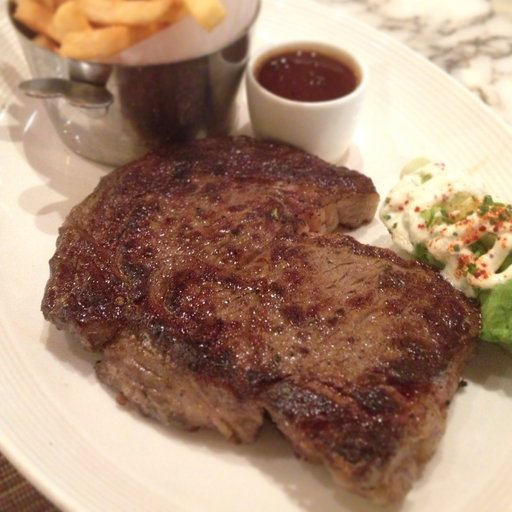

In [63]:
import random
from PIL import Image

# Set seed
#random.seed(42)

# 1. Get all image file paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image
random_image_path = random.choice(image_path_list)


# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem


# 4. Open the image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img

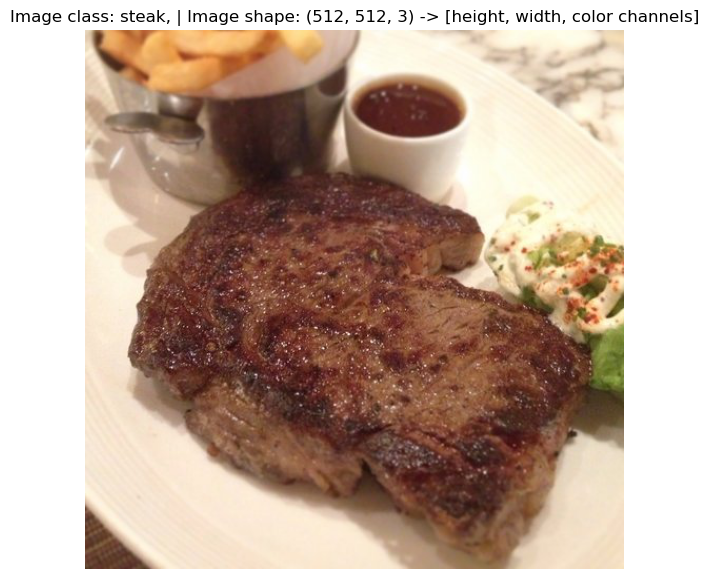

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.array(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class}, | Image shape: {img_as_array.shape} -> [height, width, color channels]")
plt.axis(False);

In [65]:
img_as_array

array([[[232, 216, 191],
        [231, 213, 189],
        [232, 215, 189],
        ...,
        [228, 208, 175],
        [228, 208, 173],
        [228, 208, 173]],

       [[232, 214, 190],
        [229, 211, 187],
        [229, 212, 186],
        ...,
        [229, 209, 174],
        [231, 208, 174],
        [231, 208, 174]],

       [[231, 213, 189],
        [227, 210, 184],
        [228, 208, 183],
        ...,
        [233, 210, 176],
        [233, 211, 174],
        [233, 211, 174]],

       ...,

       [[ 96,  69,  48],
        [101,  74,  53],
        [101,  74,  53],
        ...,
        [247, 227, 194],
        [248, 228, 195],
        [248, 228, 195]],

       [[ 88,  63,  41],
        [ 92,  67,  45],
        [ 94,  67,  46],
        ...,
        [247, 227, 194],
        [247, 227, 192],
        [247, 227, 192]],

       [[ 82,  57,  35],
        [ 84,  59,  37],
        [ 87,  62,  40],
        ...,
        [247, 227, 192],
        [247, 227, 192],
        [246, 226, 191]]